# drought

## to have year wise data based on event extend

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

em_data_filepath='emdat_public_2022_08_11_query_uid-IKGfZc.xlsx'

dfb = pd.read_excel(em_data_filepath, engine='openpyxl',skiprows=6,sheet_name = 'emdat data')

dfb_dr=dfb[dfb['Disaster Type']=='Drought']

ea_cntr=['Djibouti', 'Eritrea','Ethiopia','Kenya','Rwanda', 'Somalia','South Sudan','Sudan (the)','Tanzania, United Republic of']

#dfb1_ea=dfb1[dfb1['Country'].str.contains(ea_cntr)]
dfb_dr_ea=dfb_dr[dfb_dr['Country'].isin(ea_cntr)]
#dfb_dr_ea.info()

dfb_dr_ea_time=dfb_dr_ea[['Dis No','Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month','End Day']]
#dfb_dr_ea_time['Start Month'].tolist()
dfb_dr_ea_time['Start Month']=dfb_dr_ea_time['Start Month'].fillna(1.0)
dfb_dr_ea_time['Start Day']=dfb_dr_ea_time['Start Day'].fillna(1.0)

dfb_dr_ea_time['End Month']=dfb_dr_ea_time['End Month'].fillna(12.0)

def last_day_month(row):
    firstday_month = datetime(int(row['End Year']), int(row['End Month']), 1)
    lastday_month = firstday_month + pd.DateOffset(months=1) - pd.DateOffset(days=1)
    lastday_month_str =lastday_month.strftime("%d")
    return lastday_month_str

 
for idx,row in dfb_dr_ea_time.iterrows():
    dfb_dr_ea_time.loc[idx,'End Day'] = last_day_month(row)    
    #dfb_dr_ea_time.loc[idx,'end_day'] = last_day_month(row)    

    
#dfb_dr_ea_time['End Day']=dfb_dr_ea_time['Start Day'].fillna(28.0)


dfb_dr_ea_time['Start Year']=dfb_dr_ea_time["Start Year"].astype(str)
#dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].astype(str)
dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].apply(lambda x: str(int(x)).zfill(2))
dfb_dr_ea_time['End Year']=dfb_dr_ea_time["End Year"].astype(str)
#dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].astype(str)
dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].apply(lambda x: str(int(x)).zfill(2))

#pd.date_range('2014-10-10','2016-01-07', freq='MS').strftime("%Y-%m").tolist()

def create_daterange_list(row):
    start_date_str=row['Start Year']+'-'+row['Start Month']+'-'+str(int(row['Start Day']))
    end_date_str=row['End Year']+'-'+row['End Month']+'-'+row['End Day']
    date_str_list=pd.date_range(start_date_str,end_date_str, freq='D').strftime("%Y-%m-%d").tolist()
    return date_str_list


date_str_list_cont=[]
for idx,row in dfb_dr_ea_time.iterrows():
    #dfb_dr_ea_time.at[idx,'date_str_list'] = create_daterange_list(row)
    #print(idx)
    #print(row)
    date_str_list=create_daterange_list(row)
    date_str_list_cont.append(date_str_list)
    
#dfb_dr_ea_time

#df_dr=dfb_dr_ea_time.explode('date_str_list')

#df_dr1=df_dr.drop_duplicates('date_str_list')
dfb_dr_ea_time['date_str_list']=date_str_list_cont
df_dr=dfb_dr_ea_time.explode('date_str_list')
#df_dr1=df_dr.drop_duplicates('date_str_list')

df_t=df_dr.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

/root/miniconda3/envs/climada_env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipykernel_95/195577582.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb_dr_ea_time['Start Month']=dfb_dr_ea_time['Start Month'].fillna(1.0)
/tmp/ipykernel_95/195577582.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb_dr_ea_time['Start Day']=dfb_dr_e

In [2]:
dft1=df_t.reset_index()
dft1['date']=dft1['date_str_list'].apply(pd.to_datetime)
dft1['year']=dft1['date'].dt.year
df=dft1.groupby('year').agg({'Dis No': 'sum'})
df['disno1'] = df['Dis No'].apply(lambda x: list(set(x)))
df_year=df.reset_index()
df_year1=df_year[['year','disno1']]

## to read adm2 common data 

In [ ]:
import pandas as pd
from ast import literal_eval


import cartopy.crs as ccrs
import geopandas as gp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader

filepath='./'

filename=f'{filepath}em_dat_ea_drought_adm2_v2.xlsx'

dfb_dr=pd.read_excel(filename, engine='openpyxl')
#dfb_dr['year']= dfb_dr['Dis No'].str[:4]
#dfb_dr

dfb_dr['adm2_list'] = dfb_dr.geob_adm2_list.apply(lambda x: literal_eval(str(x)))
#dfb_dr['disno_list'] = dfb_dr['Dis No'].apply(lambda x: literal_eval(str(x)))

dfb_dr1=dfb_dr[['Dis No','adm2_list']]


# df_year3=df_year2[df_year2['year']==1990]
# dis_no_list=df_year3['disno1'].tolist()
# dis_no_flat_list = [item for sublist in dis_no_list for item in sublist]
# df_b2=dfb_dr1[dfb_dr1['Dis No'].isin(dis_no_flat_list)]
# adm2_list0=df_b2['adm2_list'].tolist()
# flat_list = [item for sublist in adm2_list0 for item in sublist]


def get_adm2_list(year,df_year,df_b):
    df_year1=df_year[df_year['year']==year]
    dis_no_list=df_year1['disno1'].tolist()
    dis_no_flat_list = [item for sublist in dis_no_list for item in sublist]
    df_b2=df_b[df_b['Dis No'].isin(dis_no_flat_list)]
    adm2_list0=df_b2['adm2_list'].tolist()
    flat_list = [item for sublist in adm2_list0 for item in sublist]
    return flat_list

def get_geodf(list_adm2_year,adm2):
    adm2_1=adm2[adm2['shapeID'].isin(list_adm2_year)]
    adm2_1a=adm2_1[['shapeID']]
    adm2_1a['event']=1.0
    db=pd.merge(adm2,adm2_1a,on='shapeID',how='right')
    db1=db[['geometry','event']]
    return db1



def make_plot(year,geodb):
    da_plt=plt
    plotsize={'width':8.0,'height':9.5}
    mainmappost={'x':0.05,'y':-0.05,'width':0.85,'height':1.1}
    da_plt.figure(figsize=(plotsize['width'],plotsize['height']))
    mainmap=da_plt.axes((mainmappost['x'],mainmappost['y'],mainmappost['width'],mainmappost['height']), projection=ccrs.PlateCarree(),zorder=10)
    x_min=21.838949
    x_max=51.415695
    y_min=-11.745695
    y_max=23.145147
    mainmap.set_extent([x_min,x_max,y_min,y_max])
    mainmap.add_geometries(geodb['geometry'], ccrs.PlateCarree(),edgecolor='red',facecolor='red', alpha=1,zorder=2)
    #mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
    mainmap.add_feature(cfeature.OCEAN, facecolor=(0.5,0.5,0.5))
    #mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
    fname='ea_shapefiles/ea_global_background.shp'
    mainmap.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')
    water_body='ea_shapefiles/Africa_Water_Bodies.shp'
    mainmap.add_geometries(Reader(water_body).geometries(),ccrs.PlateCarree(),facecolor='grey')
    mainmap.text(0.72, 0.03, str(year), fontsize=50,fontweight='bold',ha='left',va='center',color='black', transform = mainmap.transAxes)
    output_png_file=f'output/dr/{str(year)}_dr.png'
    da_plt.savefig(output_png_file, transparent=False,bbox_inches='tight')
    da_plt.close()
    

adm2=gp.read_file('ea_shapefiles/ea_adm2_geoboundaries.shp')

year_list=np.arange(1990,2023,1)


for yearl in year_list:
    list_adm2_year=get_adm2_list(yearl,df_year1,dfb_dr1)
    db_geodf=get_geodf(list_adm2_year,adm2)
    make_plot(yearl,db_geodf)
    list_adm2_year=[]
    db_geodf=[]
    print(f'complete {yearl}')

# Flood 

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np

em_data_filepath='emdat_public_2022_08_11_query_uid-IKGfZc.xlsx'

dfb = pd.read_excel(em_data_filepath, engine='openpyxl',skiprows=6,sheet_name = 'emdat data')

dfb_fl=dfb[dfb['Disaster Type']=='Flood']

ea_cntr=['Djibouti', 'Eritrea','Ethiopia','Kenya','Rwanda', 'Somalia','South Sudan','Sudan (the)','Tanzania, United Republic of']

#dfb1_ea=dfb1[dfb1['Country'].str.contains(ea_cntr)]
dfb_fl_ea=dfb_fl[dfb_fl['Country'].isin(ea_cntr)]


#dfb_dr_ea.info()

dfb_fl_ea_time=dfb_fl_ea[['Dis No','Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month','End Day']]

dfb_fl_ea_time.to_csv('em_dat_flood_dates_v0.csv')

db_time=pd.read_csv('em_dat_flood_dates_v1.csv')


db_time['Start Year']=db_time["Start Year"].astype(str)
#dfb_dr_ea_time['Start Month']=dfb_dr_ea_time["Start Month"].astype(str)
db_time['Start Month']=db_time["Start Month"].apply(lambda x: str(int(x)).zfill(2))
db_time['End Year']=db_time["End Year"].astype(str)
#dfb_dr_ea_time['End Month']=dfb_dr_ea_time["End Month"].astype(str)
db_time['End Month']=db_time["End Month"].apply(lambda x: str(int(x)).zfill(2))


def create_daterange_list(row):
    start_date_str=row['Start Year']+'-'+row['Start Month']+'-'+str(int(row['Start Day']))
    end_date_str=row['End Year']+'-'+row['End Month']+'-'+str(int(row['End Day']))
    date_str_list=pd.date_range(start_date_str,end_date_str, freq='D').strftime("%Y-%m-%d").tolist()
    return date_str_list


date_str_list_cont=[]
for idx,row in db_time.iterrows():
    #dfb_dr_ea_time.at[idx,'date_str_list'] = create_daterange_list(row)
    #print(idx)
    #print(row)
    date_str_list=create_daterange_list(row)
    date_str_list_cont.append(date_str_list)
    
    
db_time['date_str_list']=date_str_list_cont
db_time1=db_time[['Dis No','date_str_list']]
# #dfb_dr_ea_time

df_fl=db_time1.explode('date_str_list')

df_t=df_fl.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

# #df_dr1=df_dr.drop_duplicates('date_str_list')
# dfb_fl_ea_time['date_str_list']=date_str_list_cont
# df_fl=dfb_dr_ea_time.explode('date_str_list')
# #df_dr1=df_dr.drop_duplicates('date_str_list')

# df_t=df_fl.groupby('date_str_list').agg({'Dis No':lambda x: list(x)})

dft1=df_t.reset_index()
dft1['date']=dft1['date_str_list'].apply(pd.to_datetime)
dft1['year']=dft1['date'].dt.year
df=dft1.groupby('year').agg({'Dis No': 'sum'})
df['disno1'] = df['Dis No'].apply(lambda x: list(set(x)))
df_year=df.reset_index()
df_year1=df_year[['year','disno1']]


/opt/conda/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
import pandas as pd
from ast import literal_eval


import cartopy.crs as ccrs
import geopandas as gp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader

filepath='./'

filename=f'{filepath}em_dat_ea_flood_adm2_v0.xlsx'

dfb_fl=pd.read_excel(filename, engine='openpyxl')
#dfb_dr['year']= dfb_dr['Dis No'].str[:4]
#dfb_dr

dfb_fl['adm2_list'] = dfb_fl.geob_adm2_list.apply(lambda x: literal_eval(str(x)))
#dfb_dr['disno_list'] = dfb_dr['Dis No'].apply(lambda x: literal_eval(str(x)))

dfb_fl1=dfb_fl[['Dis No','adm2_list']]


# df_year3=df_year2[df_year2['year']==1990]
# dis_no_list=df_year3['disno1'].tolist()
# dis_no_flat_list = [item for sublist in dis_no_list for item in sublist]
# df_b2=dfb_dr1[dfb_dr1['Dis No'].isin(dis_no_flat_list)]
# adm2_list0=df_b2['adm2_list'].tolist()
# flat_list = [item for sublist in adm2_list0 for item in sublist]


def get_adm2_list(year,df_year,df_b):
    df_year1=df_year[df_year['year']==year]
    dis_no_list=df_year1['disno1'].tolist()
    dis_no_flat_list = [item for sublist in dis_no_list for item in sublist]
    df_b2=df_b[df_b['Dis No'].isin(dis_no_flat_list)]
    adm2_list0=df_b2['adm2_list'].tolist()
    flat_list = [item for sublist in adm2_list0 for item in sublist]
    return flat_list

def get_geodf(list_adm2_year,adm2):
    adm2_1=adm2[adm2['shapeID'].isin(list_adm2_year)]
    adm2_1a=adm2_1[['shapeID']]
    adm2_1a['event']=1.0
    db=pd.merge(adm2,adm2_1a,on='shapeID',how='right')
    db1=db[['geometry','event']]
    return db1



def make_plot(year,geodb):
    da_plt=plt
    plotsize={'width':8.0,'height':9.5}
    mainmappost={'x':0.05,'y':-0.05,'width':0.85,'height':1.1}
    da_plt.figure(figsize=(plotsize['width'],plotsize['height']))
    mainmap=da_plt.axes((mainmappost['x'],mainmappost['y'],mainmappost['width'],mainmappost['height']), projection=ccrs.PlateCarree(),zorder=10)
    x_min=21.838949
    x_max=51.415695
    y_min=-11.745695
    y_max=23.145147
    mainmap.set_extent([x_min,x_max,y_min,y_max])
    mainmap.add_geometries(geodb['geometry'], ccrs.PlateCarree(),edgecolor='red',facecolor='red', alpha=1,zorder=2)
    #mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
    mainmap.add_feature(cfeature.OCEAN, facecolor=(0.5,0.5,0.5))
    #mainmap.add_feature(cfeature.BORDERS, linewidth = 2)
    fname='ea_shapefiles/ea_global_background.shp'
    mainmap.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')
    water_body='ea_shapefiles/Africa_Water_Bodies.shp'
    mainmap.add_geometries(Reader(water_body).geometries(),ccrs.PlateCarree(),facecolor='grey')
    mainmap.text(0.72, 0.03, str(year), fontsize=50,fontweight='bold',ha='left',va='center',color='black', transform = mainmap.transAxes)
    output_png_file=f'output/fl/{str(year)}_fl.png'
    da_plt.savefig(output_png_file, transparent=False,bbox_inches='tight')
    da_plt.close()
    

adm2=gp.read_file('ea_shapefiles/ea_adm2_geoboundaries.shp')

year_list=np.arange(1990,2023,1)


for yearl in year_list:
    list_adm2_year=get_adm2_list(yearl,df_year1,dfb_fl1)
    db_geodf=get_geodf(list_adm2_year,adm2)
    make_plot(yearl,db_geodf)
    list_adm2_year=[]
    db_geodf=[]
    print(f'complete {yearl}')

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


complete 1990
complete 1991
complete 1992
complete 1993
complete 1994
complete 1995
complete 1996
complete 1997
complete 1998
complete 1999
complete 2000
complete 2001
complete 2002
complete 2003
complete 2004
complete 2005
complete 2006
complete 2007
complete 2008
complete 2009
complete 2010
complete 2011
complete 2012
complete 2013
complete 2014
complete 2015
complete 2016
complete 2017
complete 2018
complete 2019
complete 2020
complete 2021
complete 2022


# Stitiching of maps 

In [ ]:
import numpy as np
import matplotlib
import PIL
import glob

file_list=glob.glob('output/fl/*.png')

def order_file(file_list):
    filepath=os.path.dirname(file_list[0])
    file_list1 = [ntpath.basename(item).split('.')[0] for item in file_list]
    file_list1.sort()
    sorted_file_list=[f'{filepath}/{item}.png' for item in file_list1]
    return sorted_file_list

list_im=order_file(file_list)

imgs    = [ PIL.Image.open(i) for i in list_im ]

# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb1 = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs[0:6] ) )
imgs_comb2 = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs[6:12] ) )
imgs_comb3 = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs[12:18] ) )
imgs_comb4 = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs[18:24] ) )
imgs_comb5 = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs[24:30] ) )
imgs_comb6 = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs[30:35] ) )

imgs_comb0 = np.vstack((imgs_comb1,imgs_comb2,imgs_comb3,imgs_comb4,imgs_comb5,imgs_comb6))

#aa=np.meshgrid(imgs_comb)
#aa.shape
# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb0)
imgs_comb.save( 'output/test2.png' )    

# for a vertical stacking it is simple: use vstack
#imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
#imgs_comb = PIL.Image.fromarray( imgs_comb)
#imgs_comb.save( 'Trifecta_vertical.jpg' )

## matplotlib way 

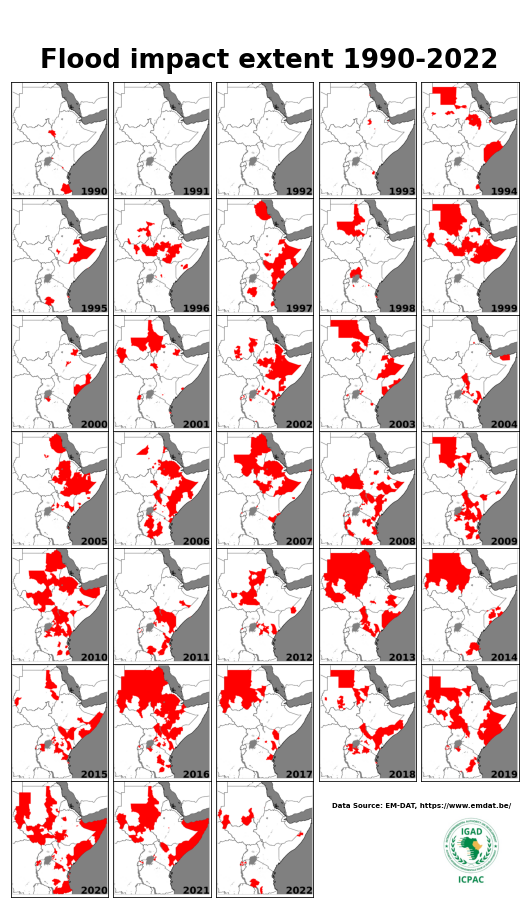

In [7]:
#def order_file(file_list):
#    filepath=os.path.basename(file_list[0])
#    ntpath.basename(file_list).split('.')[0]
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import ntpath

file_list=glob.glob('output/fl/*.png')



def order_file(file_list):
    filepath=os.path.dirname(file_list[0])
    file_list1 = [ntpath.basename(item).split('.')[0] for item in file_list]
    file_list1.sort()
    sorted_file_list=[f'{filepath}/{item}.png' for item in file_list1]
    return sorted_file_list
    
    
ls=order_file(file_list)

fig = plt.figure(figsize=(9.2,15))

#fig, axes = plt.subplots(6, 5)

#ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

#ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

#axes=fig.add_subplot(6,5)

ax = [fig.add_subplot(7,5,i+1) for i in range(35)]

# for idx, row in enumerate(ls):
#     img1 = mpimg.imread(row)
#     axs[idx].imshow(img1)

for axi,img in zip(ax,ls):
    img1=mpimg.imread(img)
    axi.imshow(img1)
    axi.set_aspect('equal')
    axi.set_yticklabels([])
    axi.set_xticklabels([])
    axi.set_xticks([])
    axi.set_yticks([])
    
fig.delaxes(ax[33])
fig.delaxes(ax[34])

sidenote=fig.add_axes([0.52, 0.9, 0.05,0.05], frame_on=False,zorder=0)
sidenote.xaxis.set_ticks_position('none')
sidenote.yaxis.set_ticks_position('none')
sidenote.set_xticklabels('')
sidenote.set_yticklabels('')
plt.text(0,0, 'Flood impact extent 1990-2022',  horizontalalignment='center',fontsize=26,fontweight='bold',color='k', verticalalignment='center',transform =sidenote.transAxes)

sidenote=fig.add_axes([0.75, 0.21, 0.05,0.05], frame_on=False,zorder=0)
sidenote.xaxis.set_ticks_position('none')
sidenote.yaxis.set_ticks_position('none')
sidenote.set_xticklabels('')
sidenote.set_yticklabels('')
plt.text(0,0, 'Data Source: EM-DAT, https://www.emdat.be/',  horizontalalignment='center',fontsize=7,fontweight='bold',color='k', verticalalignment='center',transform =sidenote.transAxes)


logofile = plt.imread('icpac_logo.png')
logo=fig.add_axes([0.76, 0.1, 0.13,0.13], frame_on=False,zorder=0) 
logo.xaxis.set_ticks_position('none')
logo.yaxis.set_ticks_position('none') 
logo.set_xticklabels('')
logo.set_yticklabels('')
logo.imshow(logofile)


plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('output/flood_extent.png', transparent=False,bbox_inches='tight',facecolor='white',dpi=200)
# plt.figure(1)
# plt.subplot(211)
# plt.imshow(img1)

# plt.subplot(212)
# plt.imshow(img2)
# plt.show()


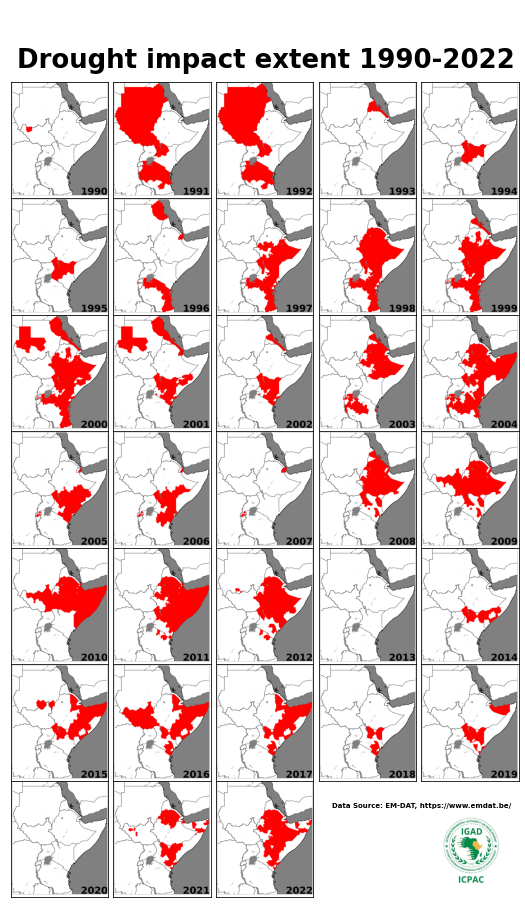

In [8]:

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import ntpath

file_list=glob.glob('output/dr/*.png')



def order_file(file_list):
    filepath=os.path.dirname(file_list[0])
    file_list1 = [ntpath.basename(item).split('.')[0] for item in file_list]
    file_list1.sort()
    sorted_file_list=[f'{filepath}/{item}.png' for item in file_list1]
    return sorted_file_list
    
    
ls=order_file(file_list)

fig = plt.figure(figsize=(9.2,15))

#fig, axes = plt.subplots(6, 5)

#ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

#ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

#axes=fig.add_subplot(6,5)

ax = [fig.add_subplot(7,5,i+1) for i in range(35)]

# for idx, row in enumerate(ls):
#     img1 = mpimg.imread(row)
#     axs[idx].imshow(img1)

for axi,img in zip(ax,ls):
    img1=mpimg.imread(img)
    axi.imshow(img1)
    axi.set_aspect('equal')
    axi.set_yticklabels([])
    axi.set_xticklabels([])
    axi.set_xticks([])
    axi.set_yticks([])
    
fig.delaxes(ax[33])
fig.delaxes(ax[34])

sidenote=fig.add_axes([0.515, 0.9, 0.05,0.05], frame_on=False,zorder=0)
sidenote.xaxis.set_ticks_position('none')
sidenote.yaxis.set_ticks_position('none')
sidenote.set_xticklabels('')
sidenote.set_yticklabels('')
plt.text(0,0, 'Drought impact extent 1990-2022',  horizontalalignment='center',fontsize=26,fontweight='bold',color='k', verticalalignment='center',transform =sidenote.transAxes)


sidenote=fig.add_axes([0.75, 0.21, 0.05,0.05], frame_on=False,zorder=0)
sidenote.xaxis.set_ticks_position('none')
sidenote.yaxis.set_ticks_position('none')
sidenote.set_xticklabels('')
sidenote.set_yticklabels('')
plt.text(0,0, 'Data Source: EM-DAT, https://www.emdat.be/',  horizontalalignment='center',fontsize=7,fontweight='bold',color='k', verticalalignment='center',transform =sidenote.transAxes)



logofile = plt.imread('icpac_logo.png')
logo=fig.add_axes([0.76, 0.1, 0.13,0.13], frame_on=False,zorder=0) 
logo.xaxis.set_ticks_position('none')
logo.yaxis.set_ticks_position('none') 
logo.set_xticklabels('')
logo.set_yticklabels('')
logo.imshow(logofile)


plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('output/drought_extent.png', transparent=False,bbox_inches='tight',facecolor='white',dpi=200)
# plt.figure(1)
# plt.subplot(211)
# plt.imshow(img1)

# plt.subplot(212)
# plt.imshow(img2)
# plt.show()


## Frequncy map for drought

In [14]:
import geopandas as gp
import pandas as pd
from ast import literal_eval


import cartopy.crs as ccrs
import geopandas as gp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader

#df_year1

dfa=df_year1.explode('disno1')
dfa['count']=1
dfa1=dfa.groupby('disno1').agg({'count': 'sum'})
dfb1=dfa.groupby('disno1').agg({'year':lambda x: list(x)})
dfa2=dfa1.reset_index()
dfb2=dfb1.reset_index()
#dfa2.sort_values('count')
db=pd.merge(dfa2,dfb2,on='disno1')
db1=db.sort_values('count')
db1.columns=['shapeID','count','year']

dis_no_flat_list=db1['shapeID'].tolist()

#filepath='/home/ea-ibf-climada/impact_catalog/'

filename=f'em_dat_ea_drought_adm2_v2.xlsx'

dfb_dr=pd.read_excel(filename, engine='openpyxl')
#dfb_dr['year']= dfb_dr['Dis No'].str[:4]
#dfb_dr

dfb_dr['adm2_list'] = dfb_dr.geob_adm2_list.apply(lambda x: literal_eval(str(x)))
#dfb_dr['disno_list'] = dfb_dr['Dis No'].apply(lambda x: literal_eval(str(x)))

dfb_dr1=dfb_dr[['Dis No','adm2_list']]

df_b2=dfb_dr1[dfb_dr1['Dis No'].isin(dis_no_flat_list)]
adm2_list0=df_b2['adm2_list'].tolist()
flat_list = [item for sublist in adm2_list0 for item in sublist]

# def get_adm2_list(year,df_year,df_b):
#     df_year1=df_year[df_year['year']==year]
#     dis_no_list=df_year1['disno1'].tolist()
#     dis_no_flat_list = [item for sublist in dis_no_list for item in sublist]
#     df_b2=df_b[df_b['Dis No'].isin(dis_no_flat_list)]
#     adm2_list0=df_b2['adm2_list'].tolist()
#     flat_list = [item for sublist in adm2_list0 for item in sublist]
#     return flat_list

# def get_geodf(list_adm2_year,adm2):
#     adm2_1=adm2[adm2['shapeID'].isin(list_adm2_year)]
#     adm2_1a=adm2_1[['shapeID']]
#     adm2_1a['event']=1.0
#     db=pd.merge(adm2,adm2_1a,on='shapeID',how='right')
#     db1=db[['geometry','event']]
#     return db1


adm2=gp.read_file('/home/ea_shapefiles/ea_adm2_geoboundaries.shp')
adm2_1=adm2[adm2['shapeID'].isin(flat_list)]
adm2_1a=adm2_1[['shapeID']]
adm2_1a['event']=1.0
db=pd.merge(adm2,adm2_1a,on='shapeID',how='right')
db1=db[['geometry','event']]
# edf=pd.merge(adm2,db1,on='shapeID',how='left')
# #db1=db[['geometry','event']]
# #db1=db[db['count'].null()]
# #db1





/tmp/ipykernel_95/2594643098.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm2_1a['event']=1.0


In [15]:
db1

,geometry,event
0,"POLYGON ((43.25550 12.51699, 42.93603 12.29450...",1.0
1,"POLYGON ((42.70948 12.37545, 42.70948 12.34583...",1.0
2,"POLYGON ((43.06891 11.83010, 43.06232 11.83672...",1.0
3,"POLYGON ((42.81077 12.19926, 42.82692 12.16228...",1.0
4,"POLYGON ((42.45401 11.87855, 42.54849 11.75905...",1.0
...,...,...
685,"POLYGON ((39.22653 -5.89266, 39.22653 -5.89295...",1.0
686,"POLYGON ((39.53077 -6.17973, 39.53135 -6.18172...",1.0
687,"POLYGON ((39.68405 -4.87051, 39.68415 -4.87070...",1.0
688,"POLYGON ((39.21318 -6.13987, 39.21339 -6.13993...",1.0


In [47]:
import os

os.listdir('/home/ea-ibf-climada/impact_catalog/')

['common_adm2_code_drought.ipynb',
 'em_dat_ea_drought_adm2.xlsx',
 '.ipynb_checkpoints',
 'undis',
 'timeseries_calendar_plot_drought.ipynb',
 'common_adm2_code_flood.ipynb',
 'map_plot_ea_dat.ipynb',
 'emdat_public_2022_08_11_query_uid-IKGfZc.xlsx',
 'em_dat_ea_gaul_geob_adm1_codeshare.csv',
 'ea_drought_location_v1.xlsx',
 'em_dat_ea_gaul_geob_adm2_codeshare_v1.xlsx']

In [37]:
db1

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,count,year
0,Ryansoro,None,BDI-ADM2-3_0_0-B1,BDI,ADM2,"POLYGON ((29.79610 -3.62674, 29.79516 -3.63288...",NaN,NaN
1,Ndava,None,BDI-ADM2-3_0_0-B2,BDI,ADM2,"POLYGON ((29.78326 -3.29783, 29.78437 -3.29926...",NaN,NaN
2,Buyengero,None,BDI-ADM2-3_0_0-B3,BDI,ADM2,"POLYGON ((29.53519 -3.74371, 29.53919 -3.74473...",NaN,NaN
3,Bugarama,None,BDI-ADM2-3_0_0-B4,BDI,ADM2,"POLYGON ((29.33631 -3.64856, 29.34259 -3.64737...",NaN,NaN
4,Rumonge,None,BDI-ADM2-3_0_0-B5,BDI,ADM2,"POLYGON ((29.31217 -3.73139, 29.31370 -3.73128...",NaN,NaN
...,...,...,...,...,...,...,...,...
967,AGAGO,UG-322,UGA-ADM2-3_0_0-B112,UGA,ADM2,"POLYGON ((33.55052 3.28146, 33.55067 3.27989, ...",NaN,NaN
968,KAGADI,None,UGA-ADM2-3_0_0-B113,UGA,ADM2,"POLYGON ((31.06062 1.16054, 31.06079 1.16050, ...",NaN,NaN
969,KIBAALE,UG-407,UGA-ADM2-3_0_0-B114,UGA,ADM2,"POLYGON ((31.12178 1.00273, 31.12179 1.00232, ...",NaN,NaN
970,GULU,UG-304,UGA-ADM2-3_0_0-B115,UGA,ADM2,"POLYGON ((32.51042 3.16134, 32.51034 3.16057, ...",NaN,NaN
